## 3.2. fMRI GLM Analysis: General Linear Model
1. What the General Linear Model (GLM) is and why it's fundamental to fMRI
2. How to create design matrices that model your experiment
3. How to fit GLMs to estimate brain activity
4. How to compute contrasts to test specific hypotheses
5. How to visualize activation maps
6. How to apply statistical thresholds


The **General Linear Model** is the workhorse of fMRI analysis. It models the measured BOLD signal as a linear combination of predictors:

$Y = X\beta + \epsilon$

Where:
- **Y**: Observed BOLD signal (what we measured)
- **X**: Design matrix (what we expect based on the experiment)
- **β**: Beta weights (effect sizes - what we want to estimate)
- **ε**: Residual error (unexplained variance)

**Key Concepts**:

1. **Design Matrix**: Encodes experimental design
   - Task regressors: When stimuli occurred (convolved with HRF)
   - Confound regressors: Motion, drift, physiological noise

2. **Hemodynamic Response Function (HRF)**: 
   - Neural activity → increased blood flow (6-8 seconds later)
   - Peak ~6 seconds after stimulus
   - Returns to baseline ~20 seconds

3. **Contrasts**: Test specific hypotheses
   - Simple effect: "Is there activation for faces?"
   - Difference: "Do faces activate more than houses?"
   - Conjunction: "What's active for both faces AND houses?"



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

import sys
sys.path.append("../../") 

from neurolib.fmri.io import load_motor_task_data, save_nifti
from neurolib.fmri.analysis import (
    fit_glm,
    compute_multiple_contrasts,
    fit_glm_and_compute_contrasts,
    extract_cluster_table,
    threshold_map,
    compute_effect_size_map
)

from neurolib.fmri.visualization import (
    plot_hrf,
    plot_event_timing,
    plot_design_matrix_summary,
    plot_activation_map,
    plot_activation_maps_grid,
    plot_glass_brains_grid,
    compare_contrasts_slices,
    plot_roi_overlay
)

from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm import fdr_threshold
from nilearn.datasets import fetch_atlas_harvard_oxford

sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")


✓ Imports successful


### Visualize the Hemodynamic Response Function

Let's first understand what the HRF looks like and how it transforms neural events into predicted BOLD signals.


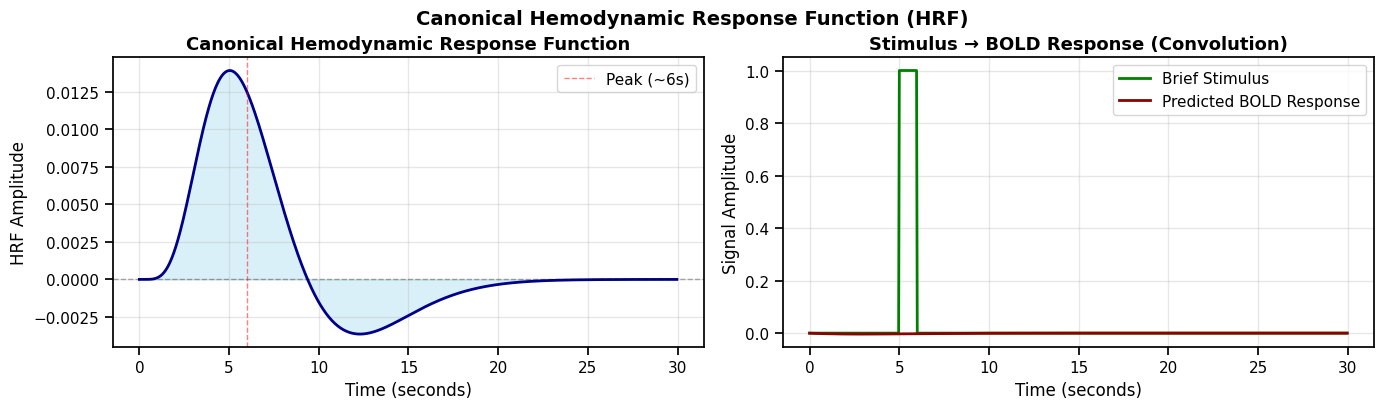

In [3]:
fig = plot_hrf(tr=2.0, duration=30)
plt.suptitle(
    'Canonical Hemodynamic Response Function (HRF)',
    fontsize=14,
    fontweight='bold',
    y=1.02
)
plt.show()

**Key observations:**
- Peak at ~6 seconds after stimulus
- Undershoot at ~12–16 seconds
- Returns to baseline by ~20 seconds
- The right panel shows how a brief stimulus gets convolved with the HRF


### Load fMRI Data

In [7]:
fmri_img, events, tr = load_motor_task_data(verbose=0)

print("\nDataset Summary:")
print(f"  fMRI image shape: {fmri_img.shape}")
print(f"  TR (repetition time): {tr} seconds")
print(f"  Number of volumes: {fmri_img.shape[3]}")
print(f"  Scan duration: {fmri_img.shape[3] * tr:.1f} seconds")

print("\nEvent Summary:")
print(f"  Total events: {len(events)}")
print("\nEvents per condition:")
print(events['trial_type'].value_counts())


NameError: name 'datasets' is not defined